In [1]:
from models import RandomPaths, r

### Key parameters

In [2]:
# Time period (in years) of the underlying price path. Trajectories are generated in the [0, T] interval
T = 1 

#Trajectories are not purely continuous. There are price points every delta_t 
delta_t = 1.0 / (365) # daily prices

# Volatility of the underlying
vol = 0.2 # 20% volatility

# On average, for small delta_t, underlying's return is equal to mu * delta_t between t and t + delta_t ==> delta_S  / S = mu * delta_t + vol * sqrt(delta_t) * N(0,1)
# mu is the expected continuously compounded rate at which grow the expected price. E(St) = S0 * exp(mu * t)
# In risk neutral universe, mu = r (risk free rate) and payoff is actualised using r to get the price
mu = r

# Initial price of underlying
S0 = 10

### Example of random underlying paths (MC pricing) generated using BS model 

In [3]:
random_paths = RandomPaths(model="black-scholes", T=T, delta_t=delta_t, vol=vol, mu=mu, S0=S0, n_simulations=5)

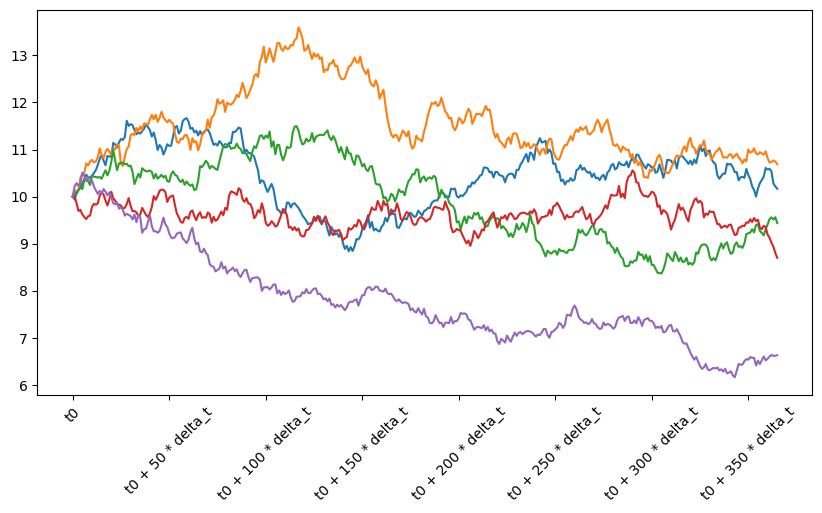

In [4]:
random_paths.plot(legend=False, figsize=(10,5), rot=45)

In [5]:
from models import Product, Call, Autocall

In [6]:
call = Call(T=1, K=11)

In [7]:
random_paths = RandomPaths(model="black-scholes", T=call.T, delta_t=1./(2*365), vol=vol, mu=mu, S0=S0, n_simulations=100000)

In [8]:
call.get_price(random_paths)

0.4632316936408006

In [9]:
athena = Autocall(T=5, coupon_rate=.07)

In [10]:
athena.get_price(random_paths)

IndexError: index 1460 is out of bounds for axis 0 with size 731